# TATR: Graphing

This notebook is part of a greater series of Juypter Notebook structured around Twitter Tweet analysis. This particular notebook will look at graphing. From saving the resulting graph to organization. This notebook will provide the a framework that can be expanded to suit your needs.

Any additional assumptions and clarification will be discussed and declared throughout the notebook.

### Note: 
This notebook will use concepts found in the TATR notebook series

Written 2018.

## Introduction Matplotlib

We are going to be using Matplotlib as the core library for graphing our data. It allows you to plot histograms to bar graphs. Therefore it is a powerful library that is well documented and has a large user base. It is because of this reason that this notebook chose to use Matplotlib as its main graphing tool.

## Import Libraries

Now we will import all the Python 3 libraries that will be used in this notebook. You do not need to know all the functionalities of each libraries as some are massive. However any functionalities that is used will be explained as they appear, therefore do not worry too much if you do not recongize the libraries. 

To import or download the required libraries see the Juypter documentation or the libraries's home page for instruction. 

### Note: 
All libraries that are used are available for Anaconda 

In [60]:
# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook (Vital)
%matplotlib inline

## Setting up some dummy data

Similar to before, this notebook will create a small set of dummy data to demostrate. This is to ensure that all those using this notebook have the ability to test out its functionality. However we will be making some modification and changes to the one made in the the other notebook.

### Dummy Panda Dataframe Structure

We are going to create 5 sets of 5 entries each entry will have 3 values (Date, hashtag_count, mention_count). To find out how to generate these values see TATR Tokenization and Extraction. 

To do so we will used 2 different functions to help create the Date and Retweet count
* pd.Timestamp(Some date format) : Which turns the input into a date 
* np.random.randint(range, how many) : Creates a random integer from 0 to range for the declared amount


In [61]:
# Setup empty dataframe
DummyDataframe = pd.DataFrame(columns=['Date', 'hashtag_count', 'mention_count'])

# Setup 5 different dates
dummyDates = [ pd.Timestamp('20180101'),  pd.Timestamp('20180201'),  pd.Timestamp('20180301'),  pd.Timestamp('20180401'),  pd.Timestamp('20180501')]

# Create 25 entries
for i in range(25):
    DummyDataframe.loc[i] = [dummyDates[i % 5], np.random.randint(150), np.random.randint(150)]
    
# See what the dataframe looks like
DummyDataframe

,Date,hashtag_count,mention_count
0,2018-01-01,5,130
1,2018-02-01,37,58
2,2018-03-01,147,148
3,2018-04-01,145,62
4,2018-05-01,93,114
5,2018-01-01,118,95
6,2018-02-01,0,31
7,2018-03-01,24,94
8,2018-04-01,96,148
9,2018-05-01,143,31


Before we move forward we are going to set the dates as the index and sort them by date (To make the data more readable). This is done to just format the data and then afterwards we will group and sum all the values. This section is building off the work done in TATR Panda Dataframe Manipulation. 

In [62]:
# Set the index to date and sort by date
DummyDataframe = DummyDataframe.set_index("Date").sort_index()

# See what it looks like
DummyDataframe = DummyDataframe.groupby("Date").sum()

## Graphing Function

We are now going to declare two version of the graphing function (which is going to be a line graph). The first will be a basic graph that plots over time. The other one will allow for comparasion between two different values. We will also be adding additional parameters that you can use to save the graph created. Therefore these functions are designed in such a way that allows you to tailor them to your own needs. 

In this notebook we will look at setting:
* Title
* Intervals (how to section our dates into date intervals)
* Saving results
* Showcasing how to draw an average line for each data column

For more information on the the functions avaiable in matplotlib see:
* https://matplotlib.org/

To find out more on how to create different date intervals (years, dates, etc) see:
* https://matplotlib.org/api/dates_api.html#matplotlib.dates.DateLocator

### Note:
All the functions will be using "Date" as the x-axis and a numerical count as the y-axis.

It also automatically draws a line on the y-axis that shows the average for that column

In [1]:
"""
Plot one of the column of a dataframe

:column        = Columns to be used for the data
:title         = The title of the graph
:date          = The index with the dates (in y-m-d format)
:dataframe     = The dataframe of the data
:intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
:saveImage     = True to save image, false to skip
:fileName      = Name of the save file
"""
def basic_plot_generator(column, title, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    # Set the interval to be the default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

"""
Plot different columns against eachother over time

:column        = Columns to be used for the data
:title    = Name of the column used
:date          = The index with the dates (in y-m-d format)
:dataframe     = The dataframe of the data
:intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
:saveImage     = True to save image, false to skip
:fileName      = Name of the save file
"""
def plot_compare_generator(column, title, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    # Set the interval to be default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

Now that we declared the two different functions we are going to test it out on our dummy data. Here I will demostrate 2 different things. The first is we can create a graph for every column in the dataframe. The second is that we can also manually decide what columns to use.

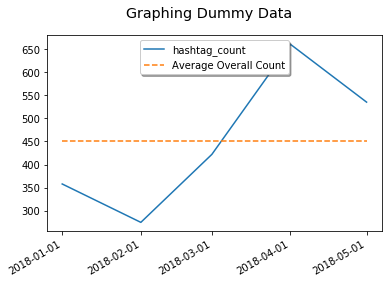

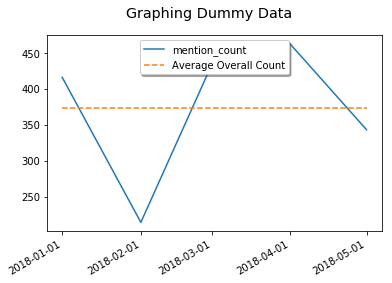

In [64]:
# Iterate through all the columns
for columns in DummyDataframe:
    # This is an example of not choosing to save the image
    basic_plot_generator(columns, "Graphing Dummy Data" ,DummyDataframe.index, DummyDataframe)

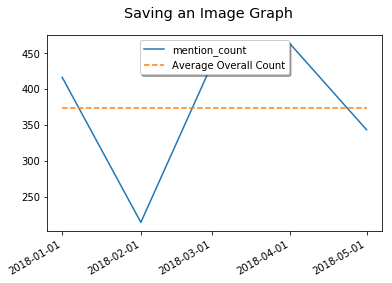

In [69]:
# Choose 1 column and save that image
basic_plot_generator("mention_count", "Saving an Image Graph" ,DummyDataframe.index, DummyDataframe,saveImage=True, fileName="dummyGraph")

Now that we demostrated the basic graph we are going to demostrate the other function

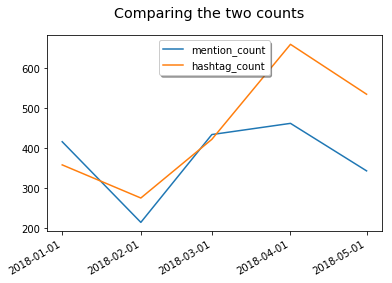

In [72]:
# Ploting mention count and the hashtag count against eachother
plot_compare_generator(['mention_count', 'hashtag_count'],"Comparing the two counts" ,DummyDataframe.index, DummyDataframe, intervalValue= 1, saveImage=True, fileName="compare")

## Conclusion

In this notebook we looked at graphing with matplotlib. The library allowed us plot all the data we have in our dataframe. In addition the functions are written in such a way that they are modular, allowing them to be adapted to fit your needs.

Although this notebook does not go into details on all the functionalities and graphs that exist within matplotlib, the documentation for matplotlib itself is extensive. Making matplotlib a good source for graphing tweet data.